# New Section
National Greenhouse Gas Emissions Inventories by the sector of origin and National Mitigation Targets as determined by the countries.

Annual country-level estimates of net emissions/removals for 215 countries are presented by six sectors, 14 sub-sectors and four gases, for the years 1970-2021. To facilitate retrieval and use, two aggregated indicators, Total GHG emissions including land-use, land-use change and forestry (LULUCF) and Total GHG emissions excluding land-use, land-use change and forestry are presented in addition to the sector-level information.[link text](https://climatedata.imf.org/datasets/72e94bc71f4441d29710a9bea4d35f1d_0/about)

**Problem Statement:**
*Greenhouse gases such as carbon dioxide, methane, and nitrous oxide trap heat in the Earth's atmosphere, leading to climate change and its associated impacts, such as sea level rise, more frequent and severe weather events, and changes in ecosystems and biodiversity.*

**Business Understanding**


*   Businesses can have a significant impact on greenhouse gas emissions through their operations, supply chains, and products.


*   Understanding Greenhouse gas emissions is critical for businesses to make informed decisions about sustainability, risk management, and long-term viability. 

*  Comprehensive understanding of the sources and impacts of emissions across the entire value chain, from raw material extraction to end-of-life disposal. 


*   Compliance with regulatory requirements to reduce emissions, such as carbon taxes or emissions trading schemes.


*  Reducing emissions can lead to cost savings, increased efficiency, and improved brand reputation. 








 



###National Greenhouse Gas Emissions Inventories and Implied National Mitigation (Nationally Determined Contributions) Targets

1. Data Analysis
2.Feature Engineering
3.Feature Selection
4. Model buiilding
5. Model Deployment

##1. Import Libraries

In [ ]:
# import necessary libraries
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###2.Reading the data

In [ ]:
df=pd.read_csv('/content/National_Greenhouse_Gas_Emissions_Inventories_and_Implied_National_Mitigation_(Nationally_Determined_Contributions)_Targets.csv',error_bad_lines=False,engine="python")

<ipython-input-2-746a6854eec9>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('/content/National_Greenhouse_Gas_Emissions_Inventories_and_Implied_National_Mitigation_(Nationally_Determined_Contributions)_Targets.csv',error_bad_lines=False,engine="python")


In [ ]:
# Determining the shape of the datset
df.shape

(20448, 74)

3.Feature Engineering

In [ ]:
# Cleaning the missing data
empty_columns=df.isnull().sum()
empty_columns=empty_columns[empty_columns.values>(0.3*len(empty_columns))]
# listing the null values columns having more than 30%
print(empty_columns)

ISO2      2761
F1970     5281
F1971     5281
F1972     5281
F1973     5281
         ...  
F2026    19820
F2027    19820
F2028    19820
F2029    19820
F2030    17939
Length: 62, dtype: int64


In [ ]:
# Searching for the column for null values
df.isnull().sum()/len(df)*100

ObjectId      0.000000
Country       0.000000
ISO2         13.502543
ISO3          0.000000
Indicator     0.000000
               ...    
F2026        96.928795
F2027        96.928795
F2028        96.928795
F2029        96.928795
F2030        87.729851
Length: 74, dtype: float64

If a column has a very high percentage of null values (e.g., more than 50%), and it is not critical to the analysis or prediction task, it may be appropriate to simply drop the column. Let's drop columns F2026,F2027,F2028,    F2029, F2030.               
        


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20448 entries, 0 to 20447
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             20448 non-null  int64  
 1   Country              20448 non-null  object 
 2   ISO2                 17687 non-null  object 
 3   ISO3                 20448 non-null  object 
 4   Indicator            20448 non-null  object 
 5   Unit                 20448 non-null  object 
 6   Source               20448 non-null  object 
 7   CTS_Code             20448 non-null  object 
 8   CTS_Name             20448 non-null  object 
 9   CTS_Full_Descriptor  20448 non-null  object 
 10  Industry             20448 non-null  object 
 11  Gas_Type             20448 non-null  object 
 12  Scale                20448 non-null  object 
 13  F1970                15167 non-null  float64
 14  F1971                15167 non-null  float64
 15  F1972                15167 non-null 

In [ ]:
#Listing empty rows and removing rows greater than 30%
empty_rows=df.isnull().sum(axis=1)
empty_rows=list(empty_rows[empty_rows.values>=0.3*len(df)].index)
df.drop(labels=empty_rows,axis=0,inplace=True)
print(len(empty_rows))

0


Dropping ID,Source,Scale and Unit columns.


In [ ]:
df.drop(['ObjectId','ISO2','ISO3','Unit','Source','CTS_Code','CTS_Full_Descriptor','Scale','F2022','F2023','F2024','F2025','F2026','F2027','F2028','F2028','F2029','F2030'],axis=1,inplace=True)

High number of missing values - drop columns F2022 - F2030. Deleted the columns having 628 missing values.

In [ ]:


df_cleaned = df.dropna()

# Print the cleaned DataFrame
print(df_cleaned)

                  Country                                          Indicator  \
0      Advanced Economies                      Annual Net Emissions/Removals   
1      Advanced Economies                      Annual Net Emissions/Removals   
2      Advanced Economies                      Annual Net Emissions/Removals   
3      Advanced Economies                      Annual Net Emissions/Removals   
4      Advanced Economies                      Annual Net Emissions/Removals   
...                   ...                                                ...   
20442            Zimbabwe  Total GHG emissions excluding land-use, land-u...   
20443            Zimbabwe  Total GHG emissions including land-use, land-u...   
20445            Zimbabwe  Total GHG emissions including land-use, land-u...   
20446            Zimbabwe  Total GHG emissions including land-use, land-u...   
20447            Zimbabwe  Total GHG emissions including land-use, land-u...   

                                       

In [ ]:
df.isnull().sum()

Country         0
Indicator       0
CTS_Name        0
Industry        0
Gas_Type        0
F1970        5281
F1971        5281
F1972        5281
F1973        5281
F1974        5281
F1975        5281
F1976        5281
F1977        5281
F1978        5281
F1979        5281
F1980        5281
F1981        5281
F1982        5281
F1983        5281
F1984        5281
F1985        5281
F1986        5281
F1987        5281
F1988        5281
F1989        5281
F1990        2876
F1991        2876
F1992        2876
F1993        2876
F1994        2876
F1995        2876
F1996        2876
F1997        2876
F1998        2876
F1999        2876
F2000        2876
F2001        2876
F2002        2876
F2003        2876
F2004        2876
F2005        2876
F2006        2876
F2007        2876
F2008        2876
F2009        2876
F2010        2876
F2011        2876
F2012        2876
F2013        2876
F2014        2876
F2015        2876
F2016        2876
F2017        2876
F2018        2876
F2019        2234
F2020     

In [ ]:
"""##Imputing the missing values with mean of the population
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='0']
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    mean_value=df[feature].mean()
    
    ## create a new feature to capture nan values
    df[feature].fillna(mean_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()
new_df=df.copy()"""
                    

"##Imputing the missing values with mean of the population\nnumerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='0']\nfor feature in numerical_with_nan:\n    ## We will replace by using median since there are outliers\n    mean_value=df[feature].mean()\n    \n    ## create a new feature to capture nan values\n    df[feature].fillna(mean_value,inplace=True)\n    \ndf[numerical_with_nan].isnull().sum()\nnew_df=df.copy()"

In [ ]:
numerical_with_nan=[feature for feature in df_cleaned.columns if df_cleaned[feature].dtypes!='0']
numerical_with_nan

['Country',
 'Indicator',
 'CTS_Name',
 'Industry',
 'Gas_Type',
 'F1970',
 'F1971',
 'F1972',
 'F1973',
 'F1974',
 'F1975',
 'F1976',
 'F1977',
 'F1978',
 'F1979',
 'F1980',
 'F1981',
 'F1982',
 'F1983',
 'F1984',
 'F1985',
 'F1986',
 'F1987',
 'F1988',
 'F1989',
 'F1990',
 'F1991',
 'F1992',
 'F1993',
 'F1994',
 'F1995',
 'F1996',
 'F1997',
 'F1998',
 'F1999',
 'F2000',
 'F2001',
 'F2002',
 'F2003',
 'F2004',
 'F2005',
 'F2006',
 'F2007',
 'F2008',
 'F2009',
 'F2010',
 'F2011',
 'F2012',
 'F2013',
 'F2014',
 'F2015',
 'F2016',
 'F2017',
 'F2018',
 'F2019',
 'F2020',
 'F2021']

4. Feature Selection

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

Preparing X and Y variables

In [ ]:
X =df_cleaned.drop(columns=['F1970',
 'F1971',
 'F1972',
 'F1973',
 'F1974',
 'F1975',
 'F1976',
 'F1977',
 'F1978',
 'F1979',
 'F1980',
 'F1981',
 'F1982',
 'F1983',
 'F1984',
 'F1985',
 'F1986',
 'F1987',
 'F1988',
 'F1989',
 'F1990',
 'F1991',
 'F1992',
 'F1993',
 'F1994',
 'F1995',
 'F1996',
 'F1997',
 'F1998',
 'F1999',
 'F2000',
 'F2001',
 'F2002',
 'F2003',
 'F2004',
 'F2005',
 'F2006',
 'F2007',
 'F2008',
 'F2009',
 'F2010',
 'F2011',
 'F2012',
 'F2013',
 'F2014',
 'F2015',
 'F2016',
 'F2017',
 'F2018',
 'F2019',
 'F2020',
 'F2021'],axis=1)
X

,Country,Indicator,CTS_Name,Industry,Gas_Type
0,Advanced Economies,Annual Net Emissions/Removals,Annual Net Emissions/Removals,Agriculture,Carbon dioxide
1,Advanced Economies,Annual Net Emissions/Removals,Annual Net Emissions/Removals,Agriculture,Greenhouse gas
2,Advanced Economies,Annual Net Emissions/Removals,Annual Net Emissions/Removals,Agriculture,Methane
3,Advanced Economies,Annual Net Emissions/Removals,Annual Net Emissions/Removals,Agriculture,Nitrous oxide
4,Advanced Economies,Annual Net Emissions/Removals,Annual Net Emissions/Removals,Buildings and other Sectors,Carbon dioxide
...,...,...,...,...,...
20442,Zimbabwe,"Total GHG emissions excluding land-use, land-u...",Total GHG Emissions Excluding Land-Use and Lan...,Not Applicable,Nitrous oxide
20443,Zimbabwe,"Total GHG emissions including land-use, land-u...",Total GHG Emissions Including Land-Use and Lan...,Not Applicable,Carbon dioxide
20445,Zimbabwe,"Total GHG emissions including land-use, land-u...",Total GHG Emissions Including Land-Use and Lan...,Not Applicable,Greenhouse gas
20446,Zimbabwe,"Total GHG emissions including land-use, land-u...",Total GHG Emissions Including Land-Use and Lan...,Not Applicable,Methane


In [ ]:
y = df_cleaned['F2019']
from sklearn.preprocessing import StandardScaler
# Convert y to a NumPy array and reshape it
#y_array = Y.to_numpy().reshape(-1, 1)

# Apply standardization
#scaler = StandardScaler()
#y = scaler.fit_transform(y_array).flatten()

# Print the transformed target variable
print(y)



0          24.984129
1        1178.929662
2         592.825548
3         561.119985
4        1414.019033
            ...     
20442       4.971025
20443      99.250957
20445     117.737745
20446      12.931867
20447       5.050305
Name: F2019, Length: 14814, dtype: float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column_name in X.columns:
  if X[column_name].dtype == object:
    X[column_name] = le.fit_transform(X[column_name])
  else:
    pass

#y = le.fit_transform(y)


In [ ]:
#X = preprocessor.fit_transform(X)

In [ ]:
X.shape

(14814, 5)

5. Model Building

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((11851, 5), (2963, 5))

Create an Evaluate Function to give all metrics after model Training

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Bagging Regressor":BaggingRegressor(),
    "Gradient Boosting Regressor":GradientBoostingRegressor(),
    "SVM Regressor":SVR(kernel = 'rbf'),
    "SGD Regressor": SGDRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
     # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.3f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1540.8224
- Mean Absolute Error: 279.3634
- R2 Score: 0.0162
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1270.9784
- Mean Absolute Error: 259.8642
- R2 Score: 0.006


Lasso
Model performance for Training set
- Root Mean Squared Error: 1540.8237
- Mean Absolute Error: 278.8834
- R2 Score: 0.0162
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1270.8611
- Mean Absolute Error: 259.4024
- R2 Score: 0.006


Ridge
Model performance for Training set
- Root Mean Squared Error: 1540.8224
- Mean Absolute Error: 279.3592
- R2 Score: 0.0162
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1270.9768
- Mean Absolute Error: 259.8600
- R2 Score: 0.006


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1178.0927
- Mean Absolute Error: 178.5194
- R2 Score

Results

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Decision Tree,9.272543e-01
6,XGBRegressor,7.216831e-01
5,Random Forest Regressor,5.970365e-01
7,CatBoosting Regressor,5.189262e-01
9,Bagging Regressor,4.792520e-01
10,Gradient Boosting Regressor,1.214959e-01
3,K-Neighbors Regressor,2.236575e-02
1,Lasso,5.741260e-03
2,Ridge,5.560105e-03
0,Linear Regression,5.557697e-03


In [ ]:
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
#Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Mean Squared Error: 115549.49174684353
 Accuracy of the model is 92.89


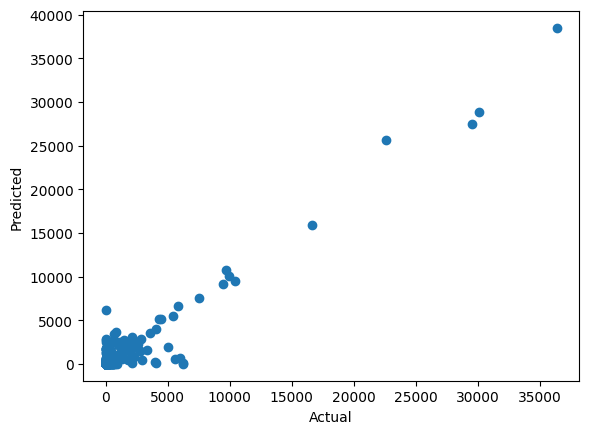

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

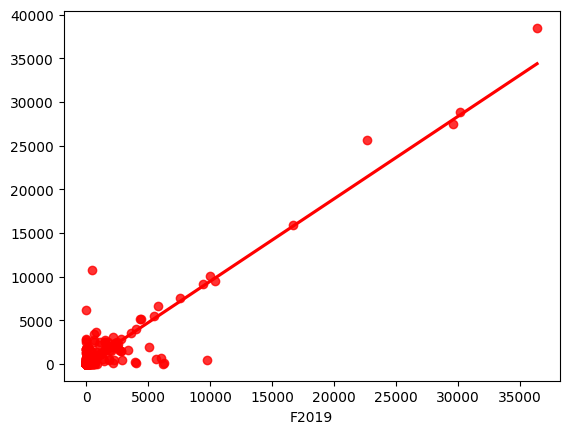

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
15411,1.902248e-02,3.055975,-3.036952
4175,3.073894e+01,0.445712,30.293224
18382,1.866940e-04,1.035701,-1.035515
2912,9.171358e-01,1.762681,-0.845545
11257,7.062138e-01,0.706214,0.000000
...,...,...,...
8608,1.043199e-01,0.104320,0.000000
15589,6.990000e-07,0.002134,-0.002133
19094,6.918751e+01,18.528028,50.659480
8855,5.832375e+01,0.303012,58.020733


Hyper parameter tuning may be performed to find the best model parameters.
